<a href="https://colab.research.google.com/github/Mookkyduke/quiz/blob/main/Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1) ศึกษาข้อมูลจากไฟล์ adult-names.txt
*   ขนาดของข้อมูลคือเท่าไร?
*   มีตัวแปรอะไรบ้าง
*   หาสถิติเบื้องต้นของตัวแปรเชิงปริมาณ
*   หาสถิติเบื้องต้นของตัวแปรเชิงคุณภาพ (ฐานนิยม)

In [33]:
# เปิดไฟล์ .txt ในโหมดอ่าน (read mode)
with open('/content/drive/MyDrive/Data Mining/adult-names.txt', 'r') as file:
    # อ่านข้อมูลทั้งหมดในไฟล์
    data = file.read()

# แสดงข้อมูลที่อ่านได้
print(data)

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [76]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining//adult-data.csv', na_values = " ?", keep_default_na = False)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
# ขนาดของข้อมูลคือเท่าไร?
df.shape

(32561, 15)

In [24]:
# มีตัวแปรอะไรบ้าง
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [37]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [25]:
# หาสถิติเบื้องต้นของตัวแปรเชิงปริมาณ
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
# หาสถิติเบื้องต้นของตัวแปรเชิงคุณภาพ (ฐานนิยม)
for column in df.columns:
    mode_value = df[column].mode().values[0]
    print(f" '{column}': {mode_value}")

 'age': 36
 ' workclass':  Private
 ' fnlwgt': 123011
 ' education':  HS-grad
 ' education-num': 9
 ' marital-status':  Married-civ-spouse
 ' occupation':  Prof-specialty
 ' relationship':  Husband
 ' race':  White
 ' sex':  Male
 ' capital-gain': 0
 ' capital-loss': 0
 ' hours-per-week': 40
 ' native-country':  United-States
 ' income':  <=50K


2) สำรวจค่าสูญหาย
*   ค่าสูญหายถูกแทนด้วยสัญลักษณ์อะไร?
*   มีค่าสูญหายจำนวนเท่าไหร่ในแต่ละคอลัมน์
*   ในกรณีนี้ให้แทนค่าสูญหายด้วย mean/median/mode

In [71]:
df.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
df.isnull().any()

age                False
 workclass          True
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation         True
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country     True
 income            False
dtype: bool

In [73]:
# มีค่าสูญหายจำนวนเท่าไหร่ในแต่ละคอลัมน์
df.isnull().sum()

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

In [79]:
# ในกรณีนี้ให้แทนค่าสูญหายด้วย mean/median/mode
df[[' workclass']] = df[[' workclass']].fillna(df[' workclass'].mode().values[0])
df[[' occupation']] = df[[' occupation']].fillna(df[' occupation'].mode().values[0])
df[[' native-country']] = df[[' native-country']].fillna(df[' native-country'].mode().values[0])

In [80]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
native-country     0
dtype: int64

3) ตอบคำถาม
*   ตัวอย่างมีถิ่นกำเนิดที่ประเทศใดบ้าง? มีคนไทยกี่คน?
*   สร้างตัวแปร capital-total = capital-gain - capital-loss
*   ตัวอย่างที่ถิ่นกำเนิดใดมีค่าเฉลี่ยของ capital-total มากที่สุด
*   อาชีพใด (occupation) มีจำนวนตัวอย่างที่มีรายได้ >50K มากที่สุด

In [81]:
# ตัวอย่างมีถิ่นกำเนิดที่ประเทศใดบ้าง? มีคนไทยกี่คน?
set(df[" native-country"])

{' Cambodia',
 ' Canada',
 ' China',
 ' Columbia',
 ' Cuba',
 ' Dominican-Republic',
 ' Ecuador',
 ' El-Salvador',
 ' England',
 ' France',
 ' Germany',
 ' Greece',
 ' Guatemala',
 ' Haiti',
 ' Holand-Netherlands',
 ' Honduras',
 ' Hong',
 ' Hungary',
 ' India',
 ' Iran',
 ' Ireland',
 ' Italy',
 ' Jamaica',
 ' Japan',
 ' Laos',
 ' Mexico',
 ' Nicaragua',
 ' Outlying-US(Guam-USVI-etc)',
 ' Peru',
 ' Philippines',
 ' Poland',
 ' Portugal',
 ' Puerto-Rico',
 ' Scotland',
 ' South',
 ' Taiwan',
 ' Thailand',
 ' Trinadad&Tobago',
 ' United-States',
 ' Vietnam',
 ' Yugoslavia'}

In [83]:
(df[" native-country"]==' Thailand').sum()

18

In [92]:
# สร้างตัวแปร capital-total = capital-gain - capital-loss
df['capital-total'] = df[' capital-gain'] - df[' capital-loss']
df['capital-total']

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital-total, Length: 32561, dtype: int64

In [96]:
# ตัวอย่างที่ถิ่นกำเนิดใดมีค่าเฉลี่ยของ capital-total มากที่สุด
df['capital-total']
# หาค่าเฉลี่ย capital-total ของแต่ละถิ่นกำเนิด
average = df.groupby(' native-country')['capital-total'].mean()
average

 native-country
 Cambodia                       844.789474
 Canada                        1374.198347
 China                          186.960000
 Columbia                       153.457627
 Cuba                           297.189474
 Dominican-Republic            1450.885714
 Ecuador                        527.607143
 El-Salvador                    543.207547
 England                        781.966667
 France                         547.034483
 Germany                        809.116788
 Greece                         988.448276
 Guatemala                      205.921875
 Haiti                          -73.295455
 Holand-Netherlands           -2205.000000
 Honduras                      -146.307692
 Hong                           -98.850000
 Hungary                        588.307692
 India                         3473.800000
 Iran                          1917.837209
 Ireland                        245.833333
 Italy                          584.424658
 Jamaica                        475.13

In [122]:
average.max()

capital-total    3473.8
dtype: float64

In [120]:
average.idxmax()

capital-total     India
dtype: object

In [111]:
# อาชีพใด (occupation) มีจำนวนตัวอย่างที่มีรายได้ >50K มากที่สุด
occupation_counts = df[df[' income']==' >50K'].sort_values(by=' occupation')
occupation_counts

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country,capital-total
17938,41,Private,372682,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K,United-States,0
7624,43,Federal-gov,203637,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,7298,0,40,United-States,>50K,United-States,7298
18623,35,Private,127306,Assoc-voc,11,Never-married,Adm-clerical,Own-child,White,Female,14344,0,40,United-States,>50K,United-States,14344
7550,39,Private,125550,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K,United-States,0
18648,31,Private,84130,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9439,58,Private,222247,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,40,United-States,>50K,United-States,-1887
28366,30,Private,206322,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,73,United-States,>50K,United-States,0
20091,27,State-gov,23740,HS-grad,9,Never-married,Transport-moving,Not-in-family,Amer-Indian-Eskimo,Male,0,0,38,United-States,>50K,United-States,0
7029,52,Private,145409,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,15024,0,60,Canada,>50K,Canada,15024


In [112]:
# หาจำนวนตัวอย่างในแต่ละอาชีพที่มีรายได้เป็น ">50K"
occupation_counts = df[df[' income'] == ' >50K'][' occupation'].value_counts()

# หาอาชีพที่มีจำนวนตัวอย่างที่มีรายได้ ">50K" มากที่สุด
max_occupation = occupation_counts.idxmax()
max_occupation_count = occupation_counts.max()

In [113]:
occupation_counts

 Prof-specialty       2050
 Exec-managerial      1968
 Sales                 983
 Craft-repair          929
 Adm-clerical          507
 Transport-moving      320
 Tech-support          283
 Machine-op-inspct     250
 Protective-serv       211
 Other-service         137
 Farming-fishing       115
 Handlers-cleaners      86
 Armed-Forces            1
 Priv-house-serv         1
Name:  occupation, dtype: int64

In [114]:
max_occupation

' Prof-specialty'

4) สร้าง visualization


*   สร้าง plot แสดงค่าเฉลี่ยของอายุ (age) ของตัวอย่างในแต่ละเพศ (sex)
*   สร้าง plot แสดงค่าเฉลี่ยของจำนวนชั่วโมงทำงานต่อสัปดาห์ (hours-per-week) ของตัวอย่างในแต่ละเชื้อชาติ (race)

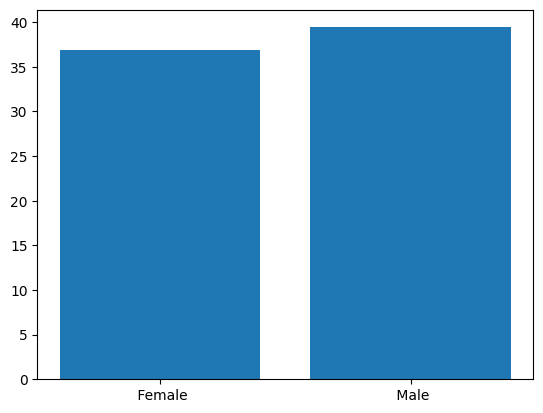

In [128]:
# สร้าง plot แสดงค่าเฉลี่ยของอายุ (age) ของตัวอย่างในแต่ละเพศ (sex)
# หาค่าเฉลี่ยอายุในแต่ละเพศ
average_age_by_sex = df.groupby(' sex')['age'].mean()

# สร้างกราฟแท่ง
plt.bar(average_age_by_sex.index, average_age_by_sex.values)

# แสดงกราฟ
plt.show()

<Axes: xlabel=' race'>

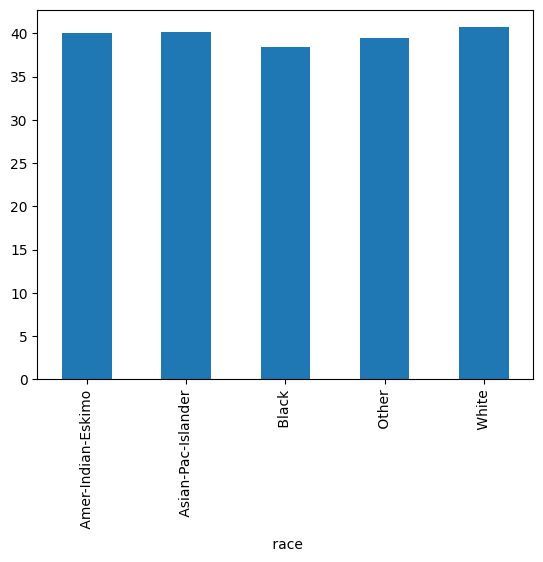

In [135]:
# สร้าง plot แสดงค่าเฉลี่ยของจำนวนชั่วโมงทำงานต่อสัปดาห์ (hours-per-week) ของตัวอย่างในแต่ละเชื้อชาติ (race)
df.groupby(' race')[' hours-per-week'].mean().plot.bar()